In [29]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import openpyxl
from scipy import stats

# File to Load
state_and_county_variables_values = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas2/StateAndCountyData.csv")
Population_Data = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas2/SupplementalDataCounty.csv")
environmental_atlas = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas2/FoodEnvironmentAtlas.xls")
# Read the modified state_and_county csv and store into Pandas DataFrame
Population_Data_df = pd.read_csv(Population_Data, encoding="utf-8")
state_and_county_df = pd.read_csv(state_and_county_variables_values, encoding="utf-8")
state_and_county_df.head()
health_data = "HEALTH"
environmental_atlas_df = pd.read_excel(environmental_atlas, "HEALTH")
environmental_atlas_df2 = pd.read_excel(environmental_atlas, "SOCIOECONOMIC")

# Assuming "State" and "County" are common identifiers
combined_df = pd.merge(environmental_atlas_df, environmental_atlas_df2, on=["State", "County"])

# Now, combined_df contains data from both sheets with a common "State" and "County"
# You can access the columns from both sheets as needed
georgia_county_filter = combined_df['State']== 'GA'

GAcounties = combined_df.loc[georgia_county_filter, ["State", "County", "PCT_DIABETES_ADULTS13", "POVRATE15"]]

GAcounties.reset_index()
# Example: Print the first few rows of the combined DataFrame
#print(combined_df.head())

,index,State,County,PCT_DIABETES_ADULTS13,POVRATE15
0,387,GA,Appling,12.9,22.5
1,388,GA,Atkinson,11.5,26.9
2,389,GA,Bacon,10.4,23.9
3,390,GA,Baker,14.8,28.7
4,391,GA,Baldwin,14.0,26.0
...,...,...,...,...,...
154,541,GA,Whitfield,13.2,15.3
155,542,GA,Wilcox,11.4,30.4
156,543,GA,Wilkes,15.5,22.9
157,544,GA,Wilkinson,14.8,20.9


In [30]:
# Rename the columns
col = {
    "PCT_DIABETES_ADULTS13": "Adult Diabetes 2013",
    "POVRATE15": "2015 Poverty Rate"
}

GAcounties.rename(columns=col, inplace=True)
# Reset the index (assuming you want to drop the default index column)
GAcounties.reset_index(drop=True, inplace=True)

# Print the DataFrame with the new column names
GAcounties

,State,County,Adult Diabetes 2013,2015 Poverty Rate
0,GA,Appling,12.9,22.5
1,GA,Atkinson,11.5,26.9
2,GA,Bacon,10.4,23.9
3,GA,Baker,14.8,28.7
4,GA,Baldwin,14.0,26.0
...,...,...,...,...
154,GA,Whitfield,13.2,15.3
155,GA,Wilcox,11.4,30.4
156,GA,Wilkes,15.5,22.9
157,GA,Wilkinson,14.8,20.9


In [31]:
print(GAcounties.columns)

Index(['State', 'County', 'Adult Diabetes 2013', '2015 Poverty Rate'], dtype='object')


The r-value is: 0.15757508043092439


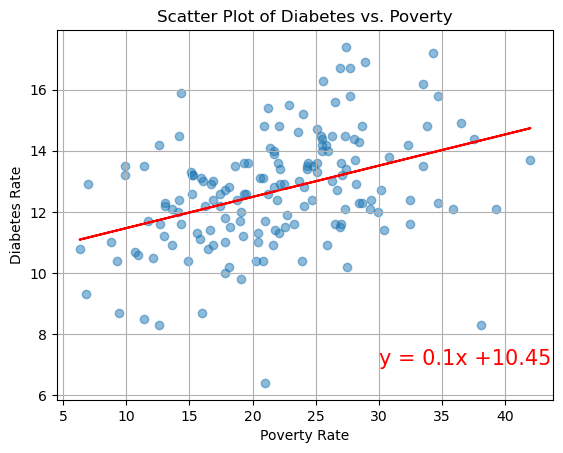

In [36]:
diabetes_column = "Adult Diabetes 2013"
poverty_column = "2015 Poverty Rate"
slope, intercept, rvalue, pvalue, stderr = linregress(GAcounties[poverty_column], GAcounties[diabetes_column])
# Scatter plot

plt.scatter(GAcounties[poverty_column], GAcounties[diabetes_column], label="2013", alpha=0.5)
regress_values = GAcounties[poverty_column] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(GAcounties[poverty_column], regress_values, color='red', label='Linear Regression')
plt.title("Scatter Plot of Diabetes vs. Poverty")
plt.xlabel("Poverty Rate")
plt.ylabel("Diabetes Rate")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")
#show plot
plt.annotate(line_eq,(30,7),fontsize=15,color="red")
plt.show()




In [37]:
# Sort the DataFrame based on the "Diabetes_Adults_2017" column in descending order
GAcounties_sorted = GAcounties.sort_values(by="Adult Diabetes 2013", ascending=False)

# Get the top 5 counties with the highest values
top_5_counties = GAcounties_sorted.head(5)

# Get the bottom 5 counties with the lowest values
bottom_5_counties = GAcounties_sorted.tail(5)
# Reset the index (assuming you want to drop the default index column)
top_5_counties.reset_index(drop=True, inplace=True)
bottom_5_counties.reset_index(drop=True, inplace=True)
# Print the top and bottom 5 counties
print("Counties with the Highest Diabetes Rates:")
top_5_counties

Counties with the Highest Diabetes Rates:


,State,County,Adult Diabetes 2013,2015 Poverty Rate
0,GA,McDuffie,17.4,27.4
1,GA,Clay,17.2,34.3
2,GA,Quitman,16.9,28.9
3,GA,Jefferson,16.7,27.7
4,GA,Randolph,16.7,26.9


The r-value is: 0.1482573078286788


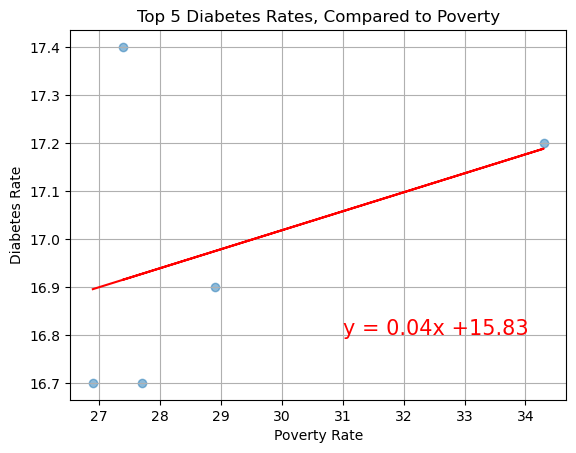

In [41]:
diabetes_column = "Adult Diabetes 2013"
poverty_column = "2015 Poverty Rate"
slope, intercept, rvalue, pvalue, stderr = linregress(top_5_counties[poverty_column], top_5_counties[diabetes_column])
# Scatter plot

plt.scatter(top_5_counties[poverty_column], top_5_counties[diabetes_column], label="2013", alpha=0.5)
regress_values = top_5_counties[poverty_column] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(top_5_counties[poverty_column], regress_values, color='red', label='Linear Regression')
plt.title("Top 5 Diabetes Rates, Compared to Poverty")
plt.xlabel("Poverty Rate")
plt.ylabel("Diabetes Rate")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")
#show plot
plt.annotate(line_eq,(31,16.8),fontsize=15,color="red")
plt.show()

In [42]:
print("\nCounties with the Lowest Diabetes Rates:")
bottom_5_counties


Counties with the Lowest Diabetes Rates:


,State,County,Adult Diabetes 2013,2015 Poverty Rate
0,GA,Cherokee,8.7,9.4
1,GA,Cobb,8.5,11.4
2,GA,Gwinnett,8.3,12.6
3,GA,Clarke,8.3,38.1
4,GA,Chattahoochee,6.4,21.0


The r-value is: 0.04963428611368652


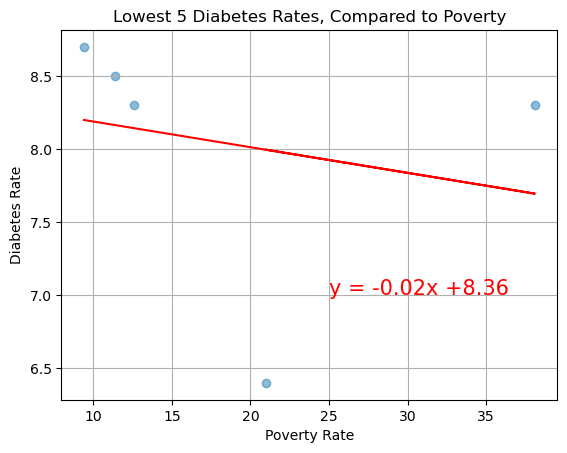

In [43]:
diabetes_column = "Adult Diabetes 2013"
poverty_column = "2015 Poverty Rate"
slope, intercept, rvalue, pvalue, stderr = linregress(bottom_5_counties[poverty_column], bottom_5_counties[diabetes_column])
# Scatter plot

plt.scatter(bottom_5_counties[poverty_column], bottom_5_counties[diabetes_column], label="2013", alpha=0.5)
regress_values = bottom_5_counties[poverty_column] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(bottom_5_counties[poverty_column], regress_values, color='red', label='Linear Regression')
plt.title("Lowest 5 Diabetes Rates, Compared to Poverty")
plt.xlabel("Poverty Rate")
plt.ylabel("Diabetes Rate")
plt.grid(True)
# Print r value
print(f"The r-value is: {rvalue**2}")
#show plot
plt.annotate(line_eq,(25,7),fontsize=15,color="red")
plt.show()